In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [18]:
from workflow_package import data

In [20]:
data.get_fremont_data??

In [8]:
data = data.get_fremont_data()
data.head(24)

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0
2012-10-03 05:00:00,21.0,10.0,31.0
2012-10-03 06:00:00,105.0,50.0,155.0
2012-10-03 07:00:00,257.0,95.0,352.0
2012-10-03 08:00:00,291.0,146.0,437.0


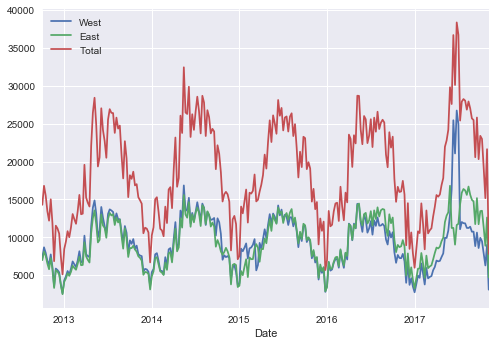

In [3]:
data.resample('W').sum().plot()

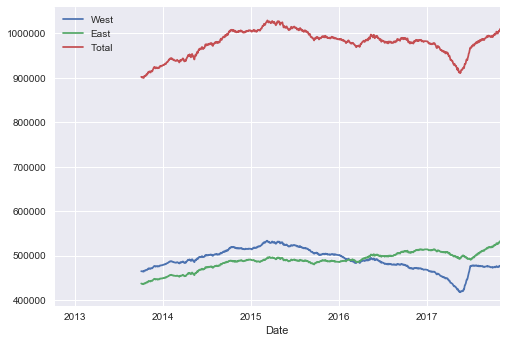

In [4]:
data.resample('D').sum().rolling(365).sum().plot() #each datapoint is the sum of previous 365 dats


(0, 1059460.05)

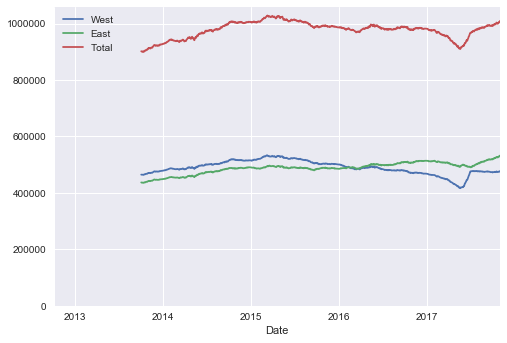

In [5]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)
#del data['Total']

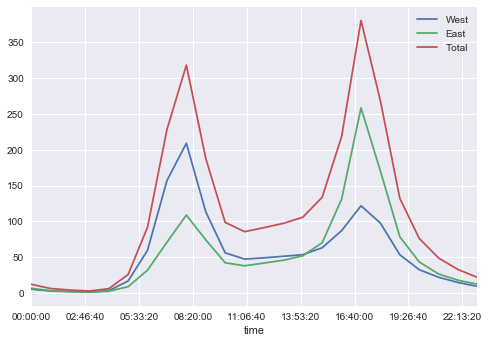

In [6]:
data.groupby(data.index.time).mean().plot()

In [7]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:6,:6]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0
05:00:00,31.0,26.0,25.0,5.0,9.0,23.0


(44520, 3)


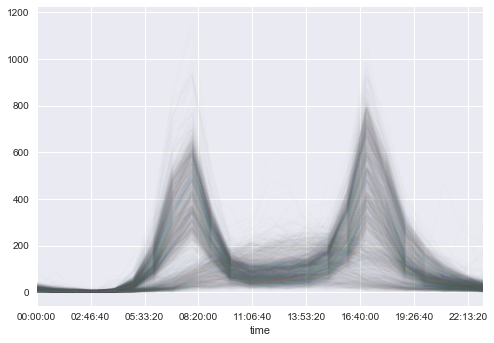

In [8]:
pivoted.plot(legend=False, alpha=0.01)
print(data.shape)